In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [51]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


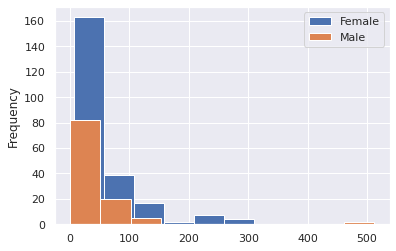

In [52]:
train["Fare"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Fare"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

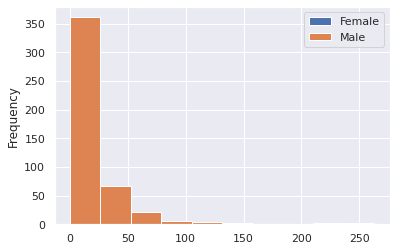

In [53]:
train["Fare"][(train["Survived"]==0)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Fare"][(train["Survived"]==0)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

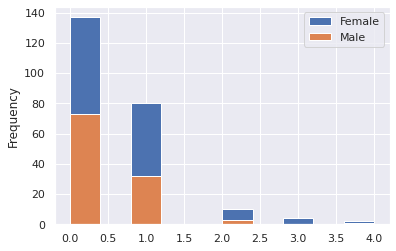

In [54]:
train["SibSp"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["SibSp"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

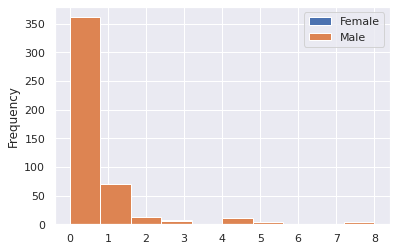

In [55]:
train["SibSp"][(train["Survived"]==0)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["SibSp"][(train["Survived"]==0)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

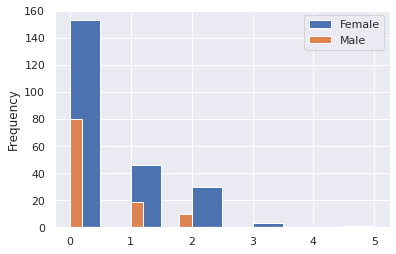

In [56]:
train["Parch"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Parch"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

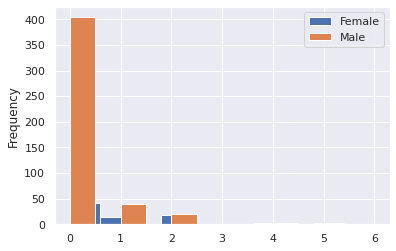

In [57]:
train["Parch"][(train["Survived"]==0)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Parch"][(train["Survived"]==0)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

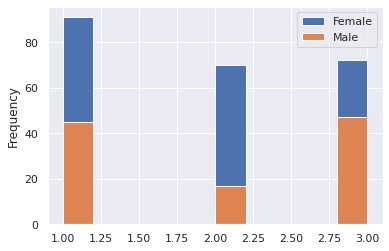

In [58]:
train["Pclass"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Pclass"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

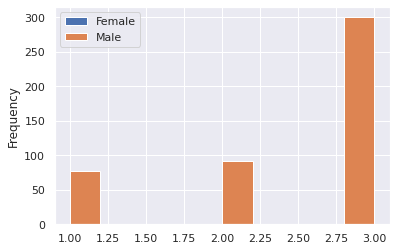

In [59]:
train["Pclass"][(train["Survived"]==0)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Pclass"][(train["Survived"]==0)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

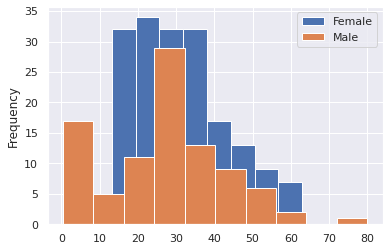

In [60]:
train["Age"][(train["Survived"]==1)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Age"][(train["Survived"]==1)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

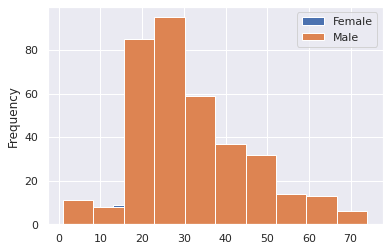

In [61]:
train["Age"][(train["Survived"]==0)&(train["Sex"]=="female")].plot(kind="hist",label="Female")
train["Age"][(train["Survived"]==0)&(train["Sex"]=="male")].plot(kind="hist",label="Male")
plt.legend()
plt.show()

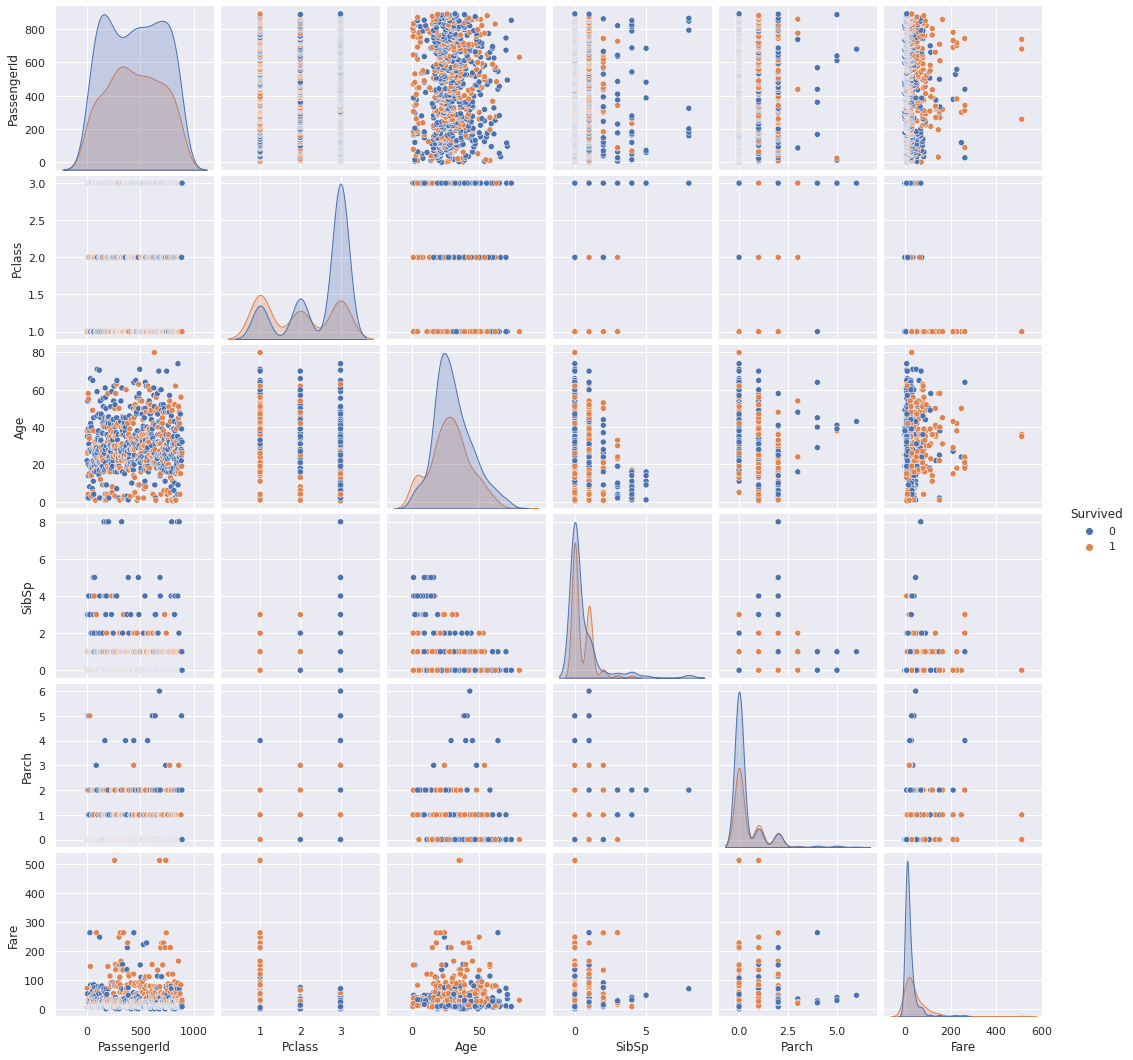

In [62]:
sns.pairplot(train, hue="Survived")

In [63]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
train["Age"] = train["Age"].fillna(value=10)

In [67]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [74]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [78]:
def transforme_sex(x:str):
    if x == "Male":
        x = 0
    else:
        x = 1

train["Sex"].apply(transforme_sex)

0      None
1      None
2      None
3      None
4      None
       ... 
886    None
887    None
888    None
889    None
890    None
Name: Sex, Length: 891, dtype: object

In [79]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,10.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [69]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(train[['Pclass','Age','SibSp','Parch','Fare']], train['Survived'])
test['cfc_predict'] = clf.predict(test[['Pclass','Age','SibSp','Parch','Fare']])
test

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values